# Aim 2 PCA and K-Means Clustering

In [58]:
# import packages

import math
import numpy as np
import pandas as pd
import scipy as sp
from scipy import cluster, spatial
from scipy.spatial import distance
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing, decomposition, cluster, ensemble, model_selection, metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.manifold import TSNE

In [59]:
data = pd.read_csv('data2.csv')
cancerfreq = pd.read_csv('cancerfreq.csv')
print(data.shape)
for column in data.columns:
    data = data[pd.isnull(data[column]) == False]
data = data.drop(['Unnamed: 0'],axis = 1)
cancerfreq = cancerfreq.drop(['Unnamed: 0'],axis = 1)
#indices = np.array(['A to T', 'A to G', 'A to C', 'T to A', 'T to G', 'T to C', 'G to A', 'G to T', 'G to C', 'C to A', 'C to T', 'C to G', 'NP neutral to P neutral', 'NP neutral to P acidic', 'NP neutral to P basic', 'P neutral to NP neutral', 'P neutral to P acidic', 'P neutral to P basic', 'P acidic to NP neutral', 'P acidic to P neutral', 'P acidic to P basic', 'P basic to NP neutral', 'P basic to P neutral', 'P basic to P acidic', 'Pathogenic']) 
#cancerfreq.set_index(indices)
print(data.shape)

(251544, 14)
(201168, 13)


In [79]:
basepair = np.zeros((data.shape[0], 12))
aminoacid = np.zeros((data.shape[0], 12))
for i, amino_acid in enumerate(data['Amino Acid Classification']):
    aminoacid[i][amino_acid-1] = 1
for i, base_pair in enumerate(data['Base Pair Substitutions']):
    basepair[i][base_pair-1] = 1
basepair = pd.DataFrame(data=basepair, columns = ['A to T', 'A to G', 'A to C', 'T to A', 'T to G', 'T to C', 'G to A', 'G to T', 'G to C', 'C to A', 'C to T', 'C to G'])
aminoacid = pd.DataFrame(data=aminoacid, columns = ['NP neutral to P neutral', 'NP neutral to P acidic', 'NP neutral to P basic', 'P neutral to NP neutral', 'P neutral to P acidic', 'P neutral to P basic', 'P acidic to NP neutral', 'P acidic to P neutral', 'P acidic to P basic', 'P basic to NP neutral', 'P basic to P neutral', 'P basic to P acidic'])

In [80]:
aminoacid.head(10)

,NP neutral to P neutral,NP neutral to P acidic,NP neutral to P basic,P neutral to NP neutral,P neutral to P acidic,P neutral to P basic,P acidic to NP neutral,P acidic to P neutral,P acidic to P basic,P basic to NP neutral,P basic to P neutral,P basic to P acidic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [84]:
data1 = data.join(basepair)
data1 = data1.join(aminoacid)

In [42]:
numerical_data = data.drop(['Variant freq', 'Protein length', 'Pathogenicity Classification', 'PON-P2_error', 'Amino_acid_substitution', 'Cancer Classification', 'Ensembl_gene_ID'], axis= 1)
numerical_data2 = data.drop(['Length-normalized variant freq', 'Variant freq', 'Protein length', 'Pathogenicity Classification', 'PON-P2_error', 'Amino_acid_substitution', 'Cancer Classification', 'Ensembl_gene_ID'], axis= 1)
numerical_data_std = sklearn.preprocessing.scale(numerical_data)
numerical_data_std2 = sklearn.preprocessing.scale(numerical_data2)
numerical_data_std = pd.DataFrame(data = numerical_data_std, columns = numerical_data.columns, index =  numerical_data.index)
numerical_data_std2 = pd.DataFrame(data = numerical_data_std2, columns = numerical_data2.columns, index =  numerical_data2.index)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.


In [91]:
data1.columns
num_data = data1.drop(['Amino_acid_substitution', 'Cancer Classification', 'Ensembl_gene_ID','PON-P2_error','Protein length','Variant freq','Base Pair Substitutions','Amino Acid Classification'], axis = 1)
num_data_std = sklearn.preprocessing.scale(num_data)
num_data_std = pd.DataFrame(data = num_data_std, columns = num_data.columns, index =  num_data.index)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


In [93]:
num_data_std.head(10)

,Length-normalized variant freq,Neoantigen freq,PON-P2_predicted_probability,Pathogenicity Classification,Normalized Average,A to T,A to G,A to C,T to A,T to G,...,NP neutral to P basic,P neutral to NP neutral,P neutral to P acidic,P neutral to P basic,P acidic to NP neutral,P acidic to P neutral,P acidic to P basic,P basic to NP neutral,P basic to P neutral,P basic to P acidic
0,2.701363,-0.375991,0.091918,-0.416243,0.421014,-0.172949,-0.266035,-0.171466,-0.173678,-0.175201,...,-0.196129,-0.316454,-0.104636,-0.223869,-0.154313,-0.243432,-0.239797,-0.226367,-0.3345,1.269389
1,2.701363,-0.375991,1.119726,-0.416243,0.044183,-0.172949,-0.266035,-0.171466,-0.173678,-0.175201,...,-0.196129,-0.316454,-0.104636,-0.223869,-0.154313,-0.243432,-0.239797,-0.226367,-0.3345,-0.787781
2,2.701363,-0.375991,1.069833,-0.416243,0.258936,-0.172949,-0.266035,-0.171466,-0.173678,-0.175201,...,-0.196129,-0.316454,-0.104636,-0.223869,-0.154313,-0.243432,-0.239797,-0.226367,-0.3345,1.269389
3,2.701363,-0.375991,-0.955847,-0.416243,0.400755,-0.172949,-0.266035,-0.171466,-0.173678,-0.175201,...,-0.196129,-0.316454,-0.104636,-0.223869,-0.154313,-0.243432,-0.239797,-0.226367,-0.3345,1.269389
4,2.701363,-0.375991,-0.566677,-0.416243,0.084702,-0.172949,-0.266035,-0.171466,-0.173678,-0.175201,...,-0.196129,-0.316454,-0.104636,-0.223869,-0.154313,-0.243432,-0.239797,-0.226367,-0.3345,1.269389
5,2.701363,-0.375991,1.069833,-0.416243,0.258936,-0.172949,-0.266035,-0.171466,-0.173678,-0.175201,...,-0.196129,-0.316454,-0.104636,-0.223869,-0.154313,-0.243432,-0.239797,-0.226367,-0.3345,1.269389
6,2.701363,-0.375991,1.389152,-0.416243,0.425066,-0.172949,-0.266035,-0.171466,-0.173678,-0.175201,...,-0.196129,3.160019,-0.104636,-0.223869,-0.154313,-0.243432,-0.239797,-0.226367,-0.3345,-0.787781
7,2.701363,-0.375991,-0.167528,-0.416243,0.425066,-0.172949,3.758900,-0.171466,-0.173678,-0.175201,...,-0.196129,-0.316454,-0.104636,-0.223869,-0.154313,-0.243432,-0.239797,-0.226367,-0.3345,1.269389
8,2.701363,-0.375991,-0.200791,-0.416243,0.376443,-0.172949,-0.266035,-0.171466,-0.173678,-0.175201,...,-0.196129,-0.316454,-0.104636,-0.223869,-0.154313,-0.243432,-0.239797,-0.226367,-0.3345,1.269389
9,2.701363,-0.375991,1.069833,-0.416243,0.258936,-0.172949,-0.266035,-0.171466,-0.173678,-0.175201,...,-0.196129,-0.316454,-0.104636,-0.223869,-0.154313,-0.243432,-0.239797,-0.226367,-0.3345,1.269389


In [95]:
#2.2.3
pca2 = sklearn.decomposition.PCA(n_components=2)
nd = pca2.fit_transform(num_data) 
nd_df = pd.DataFrame(data = nd, columns = ['PC1', 'PC2'])
nd_df['Cluster'] = data['Cancer Classification']
sb.lmplot( x="PC1", y="PC2", data=nd_df, fit_reg=False, hue='Cluster', legend=True, scatter_kws={"s": 80})
plt.title('PCA Clustering on Cancer Type')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

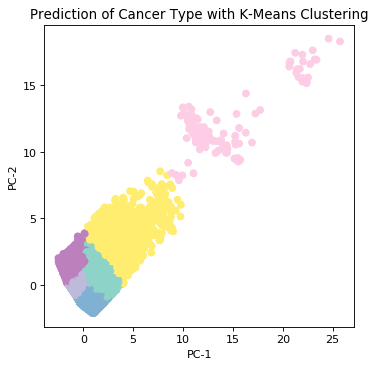

In [45]:
#cluster using kmeans
cluster_n = 6
kmeans = KMeans(n_clusters=cluster_n)  
kmeans.fit(nd)  

#plot the data for Kmeans
plt.figure(figsize=(5, 5), dpi=80)
plt.scatter(nd[:,0],nd[:,1], c=kmeans.labels_, cmap= plt.cm.Set3)
plt.title('Prediction of Cancer Type with K-Means Clustering')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.show()

### TSNE

In [46]:
tsne2 = TSNE(n_components=2).fit_transform(numerical_data_std2)
tsne2.shape

(201168, 2)

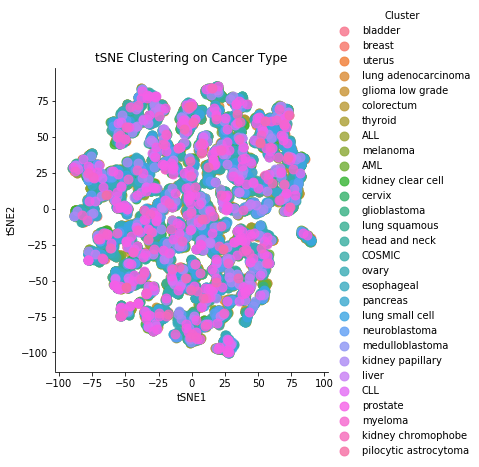

In [14]:
tsne = pd.DataFrame(data = tsne2, columns = ['tSNE1', 'tSNE2'])
tsne['Cluster'] = data['Cancer Classification']
sb.lmplot( x="tSNE1", y="tSNE2", data=tsne, fit_reg=False, hue='Cluster', legend=True, scatter_kws={"s": 80})
plt.title('tSNE Clustering on Cancer Type')
plt.show()